In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
df = pd.read_csv('..\Downloads\hmeq.csv')

In [136]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [137]:
df.info()
print('-'*40)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
----------------------------------------


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [138]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

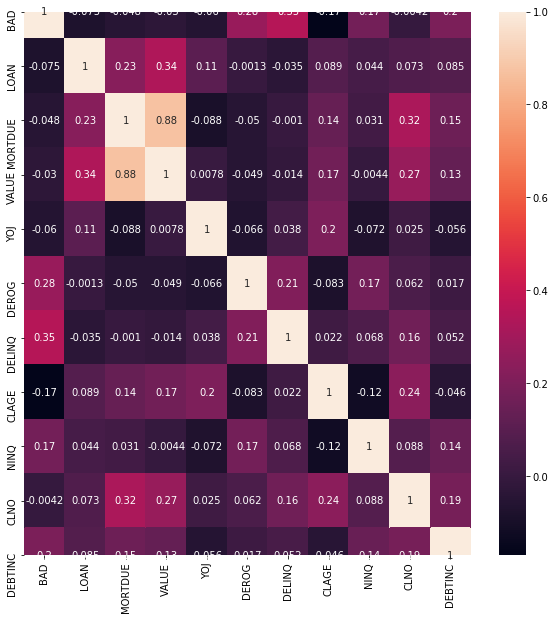

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True)

In [140]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [141]:
df['REASON'].value_counts()

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64

In [142]:
df['REASON'] = df['REASON'].dropna().map({'DebtCon':0, 'HomeImp':1})
df['JOB'] = df['JOB'].dropna().map({'Other':0, 'ProfExe':1, 'Office':2, 'Mgr':3, 'Self':4, 'Sales':5})

In [143]:
df.head(20)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1.0,0.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,1.0,0.0,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,1.0,0.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,1.0,2.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,1.0,0.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,1.0,0.0,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,1.0,0.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,1.0,0.0,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,1.0,5.0,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


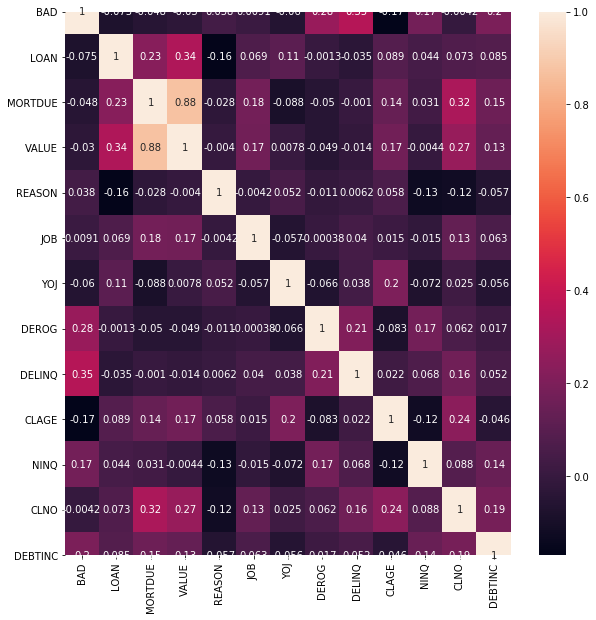

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True)

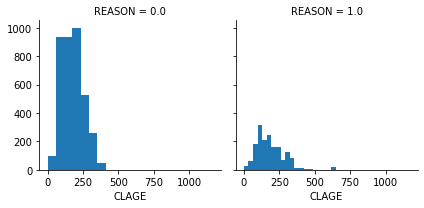

In [145]:
a = sns.FacetGrid(df, col='REASON')
a.map(plt.hist, 'CLAGE', bins=20)

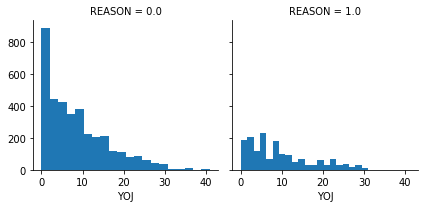

In [146]:
a = sns.FacetGrid(df, col='REASON')
a.map(plt.hist, 'YOJ', bins=20)

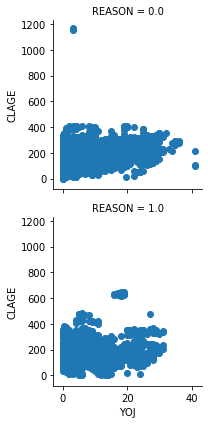

In [147]:
a = sns.FacetGrid(df, row='REASON')
a.map(plt.scatter, 'YOJ', 'CLAGE')

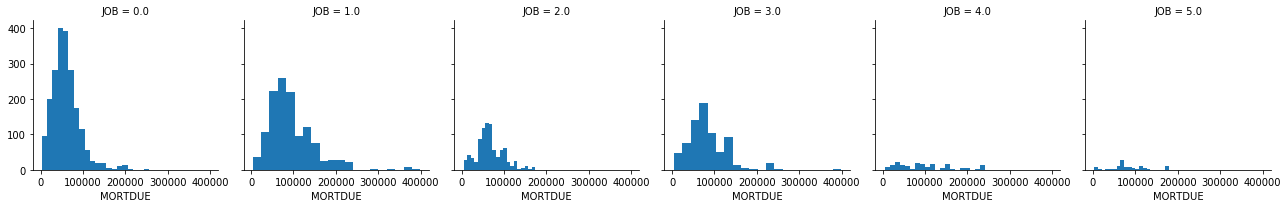

In [148]:
a = sns.FacetGrid(df, col='JOB')
a.map(plt.hist, 'MORTDUE', bins=20)

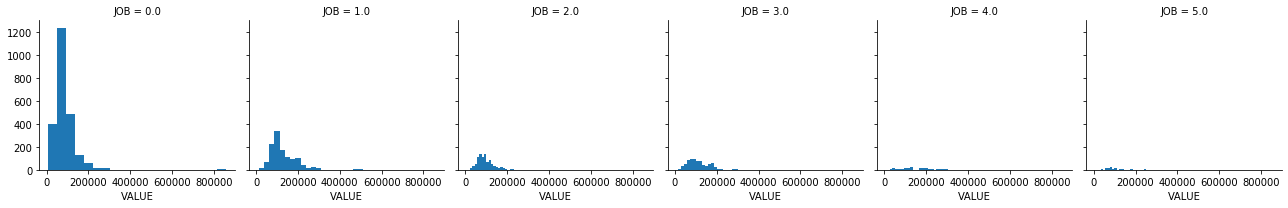

In [149]:
a = sns.FacetGrid(df, col='JOB')
a.map(plt.hist, 'VALUE', bins=20)

In [150]:
for dataset in df:
    df.loc[(df['JOB'].isnull()) & (df['VALUE']<200000), 'JOB'] = 0
    df.loc[(df['JOB'].isnull()) & (df['MORTDUE']>200000.0) & (df['MORTDUE']<300000.0), 'JOB'] = 2
    df.loc[(df['JOB'].isnull()) & (df['MORTDUE']>200000.0) & (df['MORTDUE']<300000.0), 'JOB'] = 2
df['JOB'].fillna('0', inplace=True)

In [151]:
for dataset in df:
    df.loc[(df['REASON'].isnull()) & (df['YOJ']>30.0), 'REASON'] = 0
    df.loc[(df['REASON'].isnull()) & (df['YOJ']<15.0) & (df['CLAGE']<350.0), 'REASON'] = 0
    df.loc[(df['REASON'].isnull()) & (df['CLAGE']>400.0), 'REASON'] = 1
df['REASON'].fillna('0', inplace=True)

In [152]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

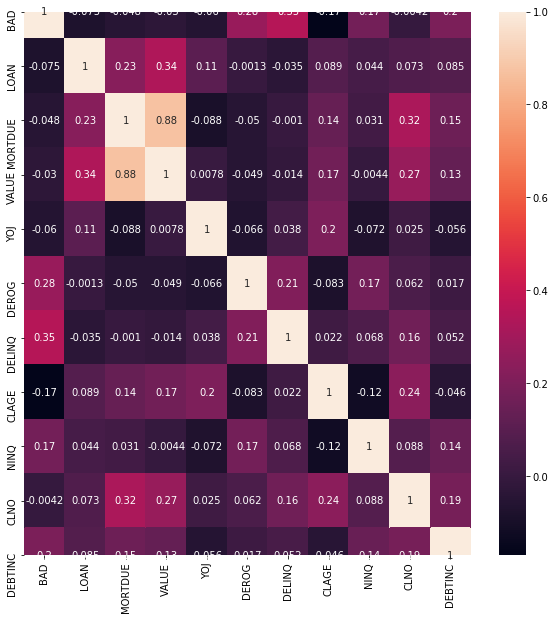

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True)

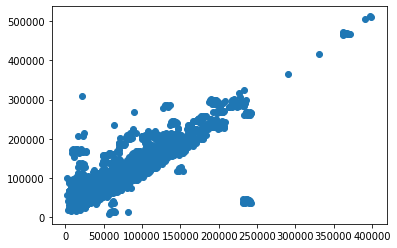

In [154]:
plt.scatter(x=df['MORTDUE'], y=df['VALUE'])

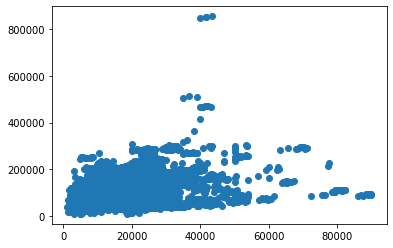

In [155]:
plt.scatter(x=df['LOAN'], y=df['VALUE'])

In [156]:
for dataset in df:
    df.loc[(df['VALUE'].isnull()), 'VALUE'] = df.loc[(df['VALUE'].isnull()), 'MORTDUE']*2
    df['VALUE'].fillna(df['VALUE'].mean(), inplace=True)

In [157]:
for dataset in df:
    df.loc[(df['MORTDUE'].isnull()), 'MORTDUE'] = df.loc[(df['MORTDUE'].isnull()), 'VALUE']/2

In [158]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

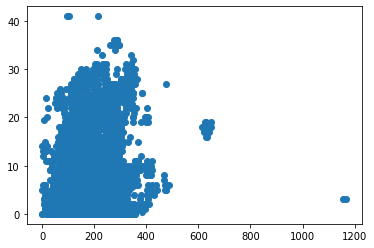

In [159]:
plt.scatter(y=df['YOJ'], x=df['CLAGE'])

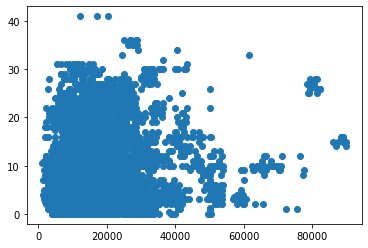

In [160]:
plt.scatter(y=df['YOJ'], x=df['LOAN'])

In [161]:
for i in list(range(0,50,1)):
    df.loc[(df['CLAGE'].isnull()) & (df['YOJ']==i) , 'CLAGE'] = df.loc[(df['YOJ']==i), 'YOJ'].mean()
df['CLAGE'].fillna(df['CLAGE'].mean(), inplace=True)

In [162]:
for dataset in df:
    df.loc[(df['YOJ'].isnull()), 'YOJ'] = df.loc[(df['YOJ'].dropna()), 'YOJ'].mean()

C:\Users\Dheeraj\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [163]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG       708
DELINQ      580
CLAGE         0
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

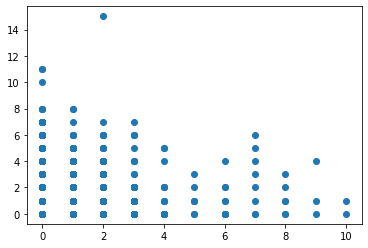

In [164]:
plt.scatter(y=df['DELINQ'], x=df['DEROG'])

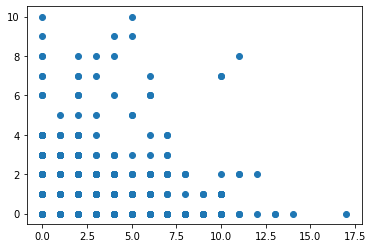

In [165]:
plt.scatter(x=df['NINQ'], y=df['DEROG'])

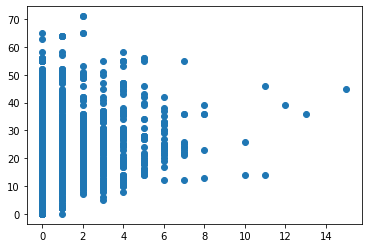

In [166]:
plt.scatter(y=df['CLNO'], x=df['DELINQ'])

In [167]:
for i in list(range(0,18,1)):
    df.loc[(df['DELINQ'].isnull()) & (df['DEROG']==i) , 'DELINQ'] = df.loc[(df['DEROG']==i), 'DELINQ'].mean()
    df.loc[(df['DEROG'].isnull()) & (df['DELINQ']==i) , 'DEROG'] = df.loc[(df['DELINQ']==i), 'DEROG'].mean()
    df.loc[(df['DEROG'].isnull()) & (df['NINQ']==i) , 'DEROG'] = df.loc[(df['NINQ']==i), 'DEROG'].mean()
    
for i in range(0,80,1):
    df.loc[(df['DELINQ'].isnull()) & (df['CLNO']==i) , 'DELINQ'] = df.loc[(df['DEROG']==i) & (df['CLNO']==i), 'DELINQ'].mean()

df['DELINQ'].fillna(df['DELINQ'].mean(), inplace=True)
df['DEROG'].fillna(df['DEROG'].mean(), inplace=True)

In [168]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG         0
DELINQ        0
CLAGE         0
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

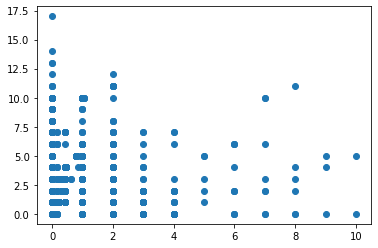

In [169]:
plt.scatter(y=df['NINQ'], x=df['DEROG'])

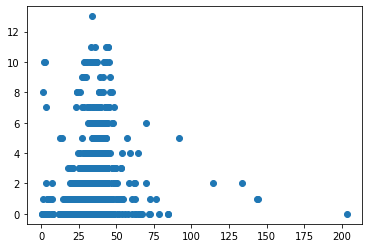

In [170]:
plt.scatter(y=df['NINQ'], x=df['DEBTINC'])

In [171]:
for i in range(0,10,1):
    df.loc[(df['NINQ'].isnull()) & (df['DEROG']==i) , 'NINQ'] = df.loc[(df['DEROG']==i), 'NINQ'].mean()
    
for i in range(0,75,1):
    df.loc[(df['NINQ'].isnull()) & (df['DEBTINC']==i) , 'NINQ'] = df.loc[(df['DEBTINC']==i), 'NINQ'].mean()
    

df['NINQ'].fillna(df['NINQ'].mean(), inplace=True)

In [172]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON        0
JOB           0
YOJ           0
DEROG         0
DELINQ        0
CLAGE         0
NINQ          0
CLNO        222
DEBTINC    1267
dtype: int64

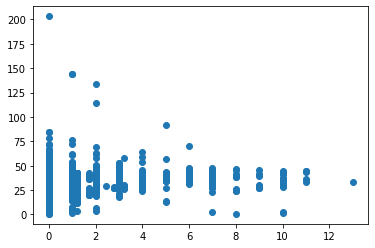

In [173]:
plt.scatter(y=df['DEBTINC'], x=df['NINQ'])

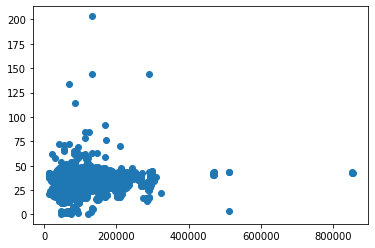

In [174]:
plt.scatter(y=df['DEBTINC'], x=df['VALUE'])

In [175]:
for i in range(0,12,1):
    df.loc[(df['DEBTINC'].isnull()) & (df['NINQ']==i) , 'DEBTINC'] = df.loc[(df['NINQ']==i), 'DEBTINC'].mean()
    
df.loc[(df['DEBTINC'].isnull()) & (df['VALUE']<200000.0), 'DEBTINC'] = df.loc[(df['VALUE']<200000.0), 'DEBTINC'].mean()
df['DEBTINC'].fillna(df['DEBTINC'].mean(), inplace=True)

In [176]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON       0
JOB          0
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO       222
DEBTINC      0
dtype: int64

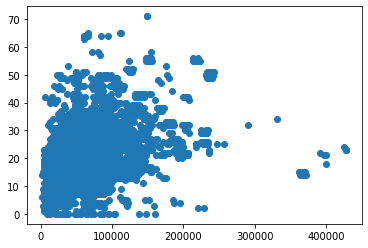

In [177]:
plt.scatter(y=df['CLNO'], x=df['MORTDUE'])

In [178]:
df.loc[(df['CLNO'].isnull()) & (df['MORTDUE']<100000.0), 'CLNO'] = df.loc[(df['MORTDUE']<200000.0), 'CLNO'].mean()
df['CLNO'].fillna(df['CLNO'].mean(), inplace=True)

In [179]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [180]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.000000,39025.000000,1,0,10.500000,0.000000,0.000000,94.366667,1.000000,9.000000,34.514546
1,1,1300,70053.000000,68400.000000,1,0,7.000000,0.000000,2.000000,121.833333,0.000000,14.000000,32.726318
2,1,1500,13500.000000,16700.000000,1,0,4.000000,0.000000,0.000000,149.466667,1.000000,10.000000,34.514546
3,1,1500,51213.769007,102427.538014,0,0,8.388972,0.259097,0.454584,174.836683,1.192982,21.042304,33.949097
4,0,1700,97800.000000,112000.000000,1,2,3.000000,0.000000,0.000000,93.333333,0.000000,14.000000,32.726318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.000000,90185.000000,0,0,16.000000,0.000000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,0,89000,54576.000000,92937.000000,0,0,16.000000,0.000000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,0,89200,54045.000000,92924.000000,0,0,15.000000,0.000000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,0,89800,50370.000000,91861.000000,0,0,14.000000,0.000000,0.000000,213.892709,0.000000,16.000000,34.340882


In [181]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

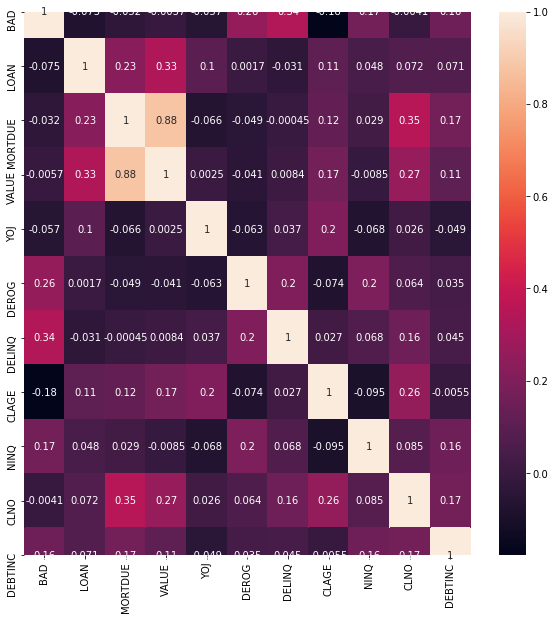

In [182]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().dropna(), annot=True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null object
JOB        5960 non-null object
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [78]:
from sklearn.model_selection import train_test_split
X = df.drop('BAD', axis=1)
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.876, total=   3.8s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.886, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.896, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.877, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.889, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.906, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.877, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.885, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.903, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.897, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.907, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.922, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.896, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.906, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.922, total=   0.4s
[CV] criterion=gini, max_depth=25, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=30, score=0.886, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.907, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.924, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.896, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.907, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.920, total=   0.5s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.899, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.907, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=45, n_estimators=90, score=0.924, total=   0.5s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.879, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.879, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.900, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.879, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.891, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.906, total=   0

[CV]  criterion=entropy, max_depth=20, n_estimators=60, score=0.918, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.889, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.902, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.924, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.887, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.904, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.920, total= 

[CV]  criterion=entropy, max_depth=35, n_estimators=30, score=0.914, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.891, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.899, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.919, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.884, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.906, total=   0.5s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.921, total= 

[CV]  criterion=entropy, max_depth=45, n_estimators=70, score=0.917, total=   0.6s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.895, total=   0.6s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.901, total=   0.6s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.919, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.893, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.898, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.917, total= 

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  2.6min finished


In [80]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 45, 'n_estimators': 60}

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.9284116331096197
precision score :  0.8239185402306255
recall score :  0.9424809424809425
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1444
           1       0.96      0.65      0.78       344

    accuracy                           0.93      1788
   macro avg       0.94      0.82      0.87      1788
weighted avg       0.93      0.93      0.92      1788



In [82]:
df1 = df.drop('BAD', axis=1)

In [83]:
df1.columns

Index(['LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG', 'DELINQ',
       'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

df1.columns

In [84]:
df1

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.000000,39025.000000,1,0,10.500000,0.000000,0.000000,94.366667,1.000000,9.000000,34.514546
1,1300,70053.000000,68400.000000,1,0,7.000000,0.000000,2.000000,121.833333,0.000000,14.000000,32.726318
2,1500,13500.000000,16700.000000,1,0,4.000000,0.000000,0.000000,149.466667,1.000000,10.000000,34.514546
3,1500,51213.769007,102427.538014,0,0,8.388972,0.259423,0.454584,174.836683,1.192982,21.042304,33.949097
4,1700,97800.000000,112000.000000,1,2,3.000000,0.000000,0.000000,93.333333,0.000000,14.000000,32.726318
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.000000,90185.000000,0,0,16.000000,0.000000,0.000000,221.808718,0.000000,16.000000,36.112347
5956,89000,54576.000000,92937.000000,0,0,16.000000,0.000000,0.000000,208.692070,0.000000,15.000000,35.859971
5957,89200,54045.000000,92924.000000,0,0,15.000000,0.000000,0.000000,212.279697,0.000000,15.000000,35.556590
5958,89800,50370.000000,91861.000000,0,0,14.000000,0.000000,0.000000,213.892709,0.000000,16.000000,34.340882


df1

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)

In [86]:
df_scaled = pd.DataFrame(scaled_features, columns=df1.columns)

In [87]:
df_scaled

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.562299,-0.981857,-1.078211e+00,1.532421,-0.877401,0.224276,-3.254971e-01,-4.239525e-01,-9.114424e-01,-1.165110e-01,-1.235192,0.069754
1,-1.544453,-0.006035,-5.786658e-01,1.532421,-0.877401,-0.259133,-3.254971e-01,1.441280e+00,-6.003416e-01,-7.202519e-01,-0.732555,-0.162877
2,-1.526606,-1.254778,-1.457866e+00,1.532421,-0.877401,-0.673484,-3.254971e-01,-4.239525e-01,-2.873531e-01,-1.165110e-01,-1.134664,0.069754
3,-1.526606,-0.422022,-2.474671e-16,-0.652562,-0.877401,-0.067293,-1.392991e-16,2.588530e-16,7.082197e-15,8.043445e-16,-0.024612,-0.003805
4,-1.508759,0.606645,1.627874e-01,1.532421,0.662896,-0.811601,-3.254971e-01,-4.239525e-01,-9.231464e-01,-7.202519e-01,-0.732555,-0.162877
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,6.272411,-0.288428,-2.081942e-01,-0.652562,-0.877401,0.983919,-3.254971e-01,-4.239525e-01,5.320280e-01,-7.202519e-01,-0.531501,0.277613
5956,6.281335,-0.347781,-1.613943e-01,-0.652562,-0.877401,0.983919,-3.254971e-01,-4.239525e-01,3.834625e-01,-7.202519e-01,-0.632028,0.244781
5957,6.299181,-0.359506,-1.616153e-01,-0.652562,-0.877401,0.845802,-3.254971e-01,-4.239525e-01,4.240977e-01,-7.202519e-01,-0.632028,0.205314
5958,6.352722,-0.440654,-1.796925e-01,-0.652562,-0.877401,0.707685,-3.254971e-01,-4.239525e-01,4.423674e-01,-7.202519e-01,-0.531501,0.047162


In [88]:
from sklearn.model_selection import train_test_split
X = df_scaled
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.879, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.886, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.899, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.875, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.884, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.891, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.880, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.884, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.901, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.900, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.909, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.926, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.893, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.905, total=   0.5s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.925, total=   0.5s
[CV] criterion=gini, max_depth=25, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=30, score=0.892, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.907, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.927, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.891, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.908, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.925, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.896, total=   0.5s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.902, total=   0.5s
[CV] criterion

[CV]  criterion=gini, max_depth=45, n_estimators=90, score=0.921, total=   0.5s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.871, total=   0.3s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.889, total=   0.3s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.897, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.880, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.889, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.898, total=   0

[CV]  criterion=entropy, max_depth=20, n_estimators=60, score=0.915, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.889, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.899, total=   0.6s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.918, total=   0.7s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.890, total=   0.7s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.901, total=   0.6s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.921, total= 

[CV]  criterion=entropy, max_depth=35, n_estimators=30, score=0.917, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.891, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.902, total=   0.5s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.920, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.899, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.899, total=   0.5s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.919, total= 

[CV]  criterion=entropy, max_depth=45, n_estimators=70, score=0.917, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.889, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.903, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.920, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.894, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.899, total=   0.5s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.922, total= 

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  2.5min finished


In [90]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 35, 'n_estimators': 90}

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.9334451901565995
precision score :  0.8392143915480255
recall score :  0.9426906131199311
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1444
           1       0.96      0.69      0.80       344

    accuracy                           0.93      1788
   macro avg       0.94      0.84      0.88      1788
weighted avg       0.93      0.93      0.93      1788



In [92]:
df.corr(method='pearson')

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
BAD,1.000000,-0.075099,-0.032027,-0.005728,-0.057135,0.261829,0.340024,-0.178272,0.168451,-0.004123,0.157297
LOAN,-0.075099,1.000000,0.225429,0.328475,0.099667,0.001442,-0.031134,0.107870,0.048017,0.072297,0.071395
MORTDUE,-0.032027,0.225429,1.000000,0.880051,-0.065977,-0.049255,-0.000450,0.122465,0.029189,0.353584,0.168274
VALUE,-0.005728,0.328475,0.880051,1.000000,0.002498,-0.041831,0.008372,0.167731,-0.008492,0.265914,0.107499
YOJ,-0.057135,0.099667,-0.065977,0.002498,1.000000,-0.062685,0.036941,0.202505,-0.068264,0.026288,-0.048877
DEROG,0.261829,0.001442,-0.049255,-0.041831,-0.062685,1.000000,0.200973,-0.074065,0.195341,0.063545,0.034528
DELINQ,0.340024,-0.031134,-0.000450,0.008372,0.036941,0.200973,1.000000,0.026999,0.068169,0.156015,0.044980
CLAGE,-0.178272,0.107870,0.122465,0.167731,0.202505,-0.074065,0.026999,1.000000,-0.094895,0.258531,-0.005527
NINQ,0.168451,0.048017,0.029189,-0.008492,-0.068264,0.195341,0.068169,-0.094895,1.000000,0.084568,0.155115
CLNO,-0.004123,0.072297,0.353584,0.265914,0.026288,0.063545,0.156015,0.258531,0.084568,1.000000,0.167672


In [93]:
df2 = df.drop(['LOAN','MORTDUE','YOJ','VALUE','CLAGE','CLNO'], axis=1)

In [94]:
df2

,BAD,REASON,JOB,DEROG,DELINQ,NINQ,DEBTINC
0,1,1,0,0.000000,0.000000,1.000000,34.514546
1,1,1,0,0.000000,2.000000,0.000000,32.726318
2,1,1,0,0.000000,0.000000,1.000000,34.514546
3,1,0,0,0.259423,0.454584,1.192982,33.949097
4,0,1,2,0.000000,0.000000,0.000000,32.726318
...,...,...,...,...,...,...,...
5955,0,0,0,0.000000,0.000000,0.000000,36.112347
5956,0,0,0,0.000000,0.000000,0.000000,35.859971
5957,0,0,0,0.000000,0.000000,0.000000,35.556590
5958,0,0,0,0.000000,0.000000,0.000000,34.340882


In [95]:
df2.corr(method='pearson')

,BAD,DEROG,DELINQ,NINQ,DEBTINC
BAD,1.000000,0.261829,0.340024,0.168451,0.157297
DEROG,0.261829,1.000000,0.200973,0.195341,0.034528
DELINQ,0.340024,0.200973,1.000000,0.068169,0.044980
NINQ,0.168451,0.195341,0.068169,1.000000,0.155115
DEBTINC,0.157297,0.034528,0.044980,0.155115,1.000000


In [96]:
from sklearn.model_selection import train_test_split
X = df2.drop('BAD', axis=1)
y = df2['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier(n_jobs=-1)
param = {'n_estimators':range(30,100,10), 'max_depth':range(10,50,5), 'criterion':['gini','entropy']}
grid = GridSearchCV(model, param, cv=3, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_
predictions = grid.predict(X_test)

Fitting 3 folds for each of 112 candidates, totalling 336 fits
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.858, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.868, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=30 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, n_estimators=30, score=0.872, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.863, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.867, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=40 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=40, score=0.871, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.862, total=   0.4s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.866, total=   0.3s
[CV] criterion=gini, max_depth=10, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=10, n_estimators=50, score=0.871, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.845, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.853, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=80 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=80, score=0.866, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.849, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.855, total=   0.4s
[CV] criterion=gini, max_depth=20, n_estimators=90 ...................
[CV]  criterion=gini, max_depth=20, n_estimators=90, score=0.866, total=   0.4s
[CV] criterion=gini, max_depth=25, n_estimators=30 ...................
[CV]  criterion=gini, max_depth=25, n_estimators=30, score=0.849, total=   0.3s
[CV] criterion

[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.854, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=50 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=50, score=0.871, total=   0.3s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.848, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.850, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=60 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=60, score=0.857, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.844, total=   0.4s
[CV] criterion=gini, max_depth=35, n_estimators=70 ...................
[CV]  criterion=gini, max_depth=35, n_estimators=70, score=0.854, total=   0.4s
[CV] criterion

[CV]  criterion=gini, max_depth=45, n_estimators=90, score=0.865, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.857, total=   0.3s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.869, total=   0.3s
[CV] criterion=entropy, max_depth=10, n_estimators=30 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=30, score=0.878, total=   0.3s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.854, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.862, total=   0.4s
[CV] criterion=entropy, max_depth=10, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=10, n_estimators=40, score=0.873, total=   0

[CV]  criterion=entropy, max_depth=20, n_estimators=60, score=0.878, total=   0.4s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.852, total=   0.4s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.852, total=   0.4s
[CV] criterion=entropy, max_depth=20, n_estimators=70 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=70, score=0.875, total=   0.5s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.845, total=   0.4s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=20, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=20, n_estimators=80, score=0.866, total= 

[CV]  criterion=entropy, max_depth=35, n_estimators=30, score=0.868, total=   0.3s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.848, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.850, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=40 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=40, score=0.865, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.845, total=   0.3s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.851, total=   0.4s
[CV] criterion=entropy, max_depth=35, n_estimators=50 ................
[CV]  criterion=entropy, max_depth=35, n_estimators=50, score=0.862, total= 

[CV]  criterion=entropy, max_depth=45, n_estimators=70, score=0.868, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.846, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.853, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=80 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=80, score=0.876, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.848, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.857, total=   0.4s
[CV] criterion=entropy, max_depth=45, n_estimators=90 ................
[CV]  criterion=entropy, max_depth=45, n_estimators=90, score=0.867, total= 

[Parallel(n_jobs=1)]: Done 336 out of 336 | elapsed:  2.2min finished


In [98]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 90}

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))

accuracy score :  0.8842281879194631
precision score :  0.7400953423951555
recall score :  0.8584224651161393
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1444
           1       0.82      0.51      0.63       344

    accuracy                           0.88      1788
   macro avg       0.86      0.74      0.78      1788
weighted avg       0.88      0.88      0.87      1788



In [223]:
required_columns

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [222]:
required_columns=['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [191]:
df[['REASON','JOB']] = df[['REASON','JOB']].astype('int64')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5960 non-null float64
VALUE      5960 non-null float64
REASON     5960 non-null int64
JOB        5960 non-null int64
YOJ        5960 non-null float64
DEROG      5960 non-null float64
DELINQ     5960 non-null float64
CLAGE      5960 non-null float64
NINQ       5960 non-null float64
CLNO       5960 non-null float64
DEBTINC    5960 non-null float64
dtypes: float64(9), int64(4)
memory usage: 605.4 KB


In [212]:
df3 = pd.read_csv('..\Downloads\hmeq.csv')

df3

### df3.info()

In [213]:
df3.head(20)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [214]:
df3.dropna()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [221]:
df3 = df3.drop(['REASON','JOB'], axis=1)

In [224]:
from sklearn.model_selection import train_test_split
X = df3[required_columns]
y = df3['BAD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [225]:
from xgboost import XGBClassifier
depth = [3,5,7]
for dp in depth:
    model1 = XGBClassifier(max_depth=3, n_estimators=500, learning_rate=0.05, scale_pos_weight=1, min_child_weight=2)
    model1.fit(X_train,y_train)
    predictions = model1.predict(y_test)

ValueError: feature_names mismatch: ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f142', 'f143', 'f144', 'f145', 'f146', 'f147', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f186', 'f187', 'f188', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f209', 'f210', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f217', 'f218', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f228', 'f229', 'f230', 'f231', 'f232', 'f233', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f241', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'f285', 'f286', 'f287', 'f288', 'f289', 'f290', 'f291', 'f292', 'f293', 'f294', 'f295', 'f296', 'f297', 'f298', 'f299', 'f300', 'f301', 'f302', 'f303', 'f304', 'f305', 'f306', 'f307', 'f308', 'f309', 'f310', 'f311', 'f312', 'f313', 'f314', 'f315', 'f316', 'f317', 'f318', 'f319', 'f320', 'f321', 'f322', 'f323', 'f324', 'f325', 'f326', 'f327', 'f328', 'f329', 'f330', 'f331', 'f332', 'f333', 'f334', 'f335', 'f336', 'f337', 'f338', 'f339', 'f340', 'f341', 'f342', 'f343', 'f344', 'f345', 'f346', 'f347', 'f348', 'f349', 'f350', 'f351', 'f352', 'f353', 'f354', 'f355', 'f356', 'f357', 'f358', 'f359', 'f360', 'f361', 'f362', 'f363', 'f364', 'f365', 'f366', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'f373', 'f374', 'f375', 'f376', 'f377', 'f378', 'f379', 'f380', 'f381', 'f382', 'f383', 'f384', 'f385', 'f386', 'f387', 'f388', 'f389', 'f390', 'f391', 'f392', 'f393', 'f394', 'f395', 'f396', 'f397', 'f398', 'f399', 'f400', 'f401', 'f402', 'f403', 'f404', 'f405', 'f406', 'f407', 'f408', 'f409', 'f410', 'f411', 'f412', 'f413', 'f414', 'f415', 'f416', 'f417', 'f418', 'f419', 'f420', 'f421', 'f422', 'f423', 'f424', 'f425', 'f426', 'f427', 'f428', 'f429', 'f430', 'f431', 'f432', 'f433', 'f434', 'f435', 'f436', 'f437', 'f438', 'f439', 'f440', 'f441', 'f442', 'f443', 'f444', 'f445', 'f446', 'f447', 'f448', 'f449', 'f450', 'f451', 'f452', 'f453', 'f454', 'f455', 'f456', 'f457', 'f458', 'f459', 'f460', 'f461', 'f462', 'f463', 'f464', 'f465', 'f466', 'f467', 'f468', 'f469', 'f470', 'f471', 'f472', 'f473', 'f474', 'f475', 'f476', 'f477', 'f478', 'f479', 'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f488', 'f489', 'f490', 'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f498', 'f499', 'f500', 'f501', 'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f508', 'f509', 'f510', 'f511', 'f512', 'f513', 'f514', 'f515', 'f516', 'f517', 'f518', 'f519', 'f520', 'f521', 'f522', 'f523', 'f524', 'f525', 'f526', 'f527', 'f528', 'f529', 'f530', 'f531', 'f532', 'f533', 'f534', 'f535', 'f536', 'f537', 'f538', 'f539', 'f540', 'f541', 'f542', 'f543', 'f544', 'f545', 'f546', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f553', 'f554', 'f555', 'f556', 'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f563', 'f564', 'f565', 'f566', 'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576', 'f577', 'f578', 'f579', 'f580', 'f581', 'f582', 'f583', 'f584', 'f585', 'f586', 'f587', 'f588', 'f589', 'f590', 'f591', 'f592', 'f593', 'f594', 'f595', 'f596', 'f597', 'f598', 'f599', 'f600', 'f601', 'f602', 'f603', 'f604', 'f605', 'f606', 'f607', 'f608', 'f609', 'f610', 'f611', 'f612', 'f613', 'f614', 'f615', 'f616', 'f617', 'f618', 'f619', 'f620', 'f621', 'f622', 'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f629', 'f630', 'f631', 'f632', 'f633', 'f634', 'f635', 'f636', 'f637', 'f638', 'f639', 'f640', 'f641', 'f642', 'f643', 'f644', 'f645', 'f646', 'f647', 'f648', 'f649', 'f650', 'f651', 'f652', 'f653', 'f654', 'f655', 'f656', 'f657', 'f658', 'f659', 'f660', 'f661', 'f662', 'f663', 'f664', 'f665', 'f666', 'f667', 'f668', 'f669', 'f670', 'f671', 'f672', 'f673', 'f674', 'f675', 'f676', 'f677', 'f678', 'f679', 'f680', 'f681', 'f682', 'f683', 'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 'f693', 'f694', 'f695', 'f696', 'f697', 'f698', 'f699', 'f700', 'f701', 'f702', 'f703', 'f704', 'f705', 'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 'f715', 'f716', 'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f723', 'f724', 'f725', 'f726', 'f727', 'f728', 'f729', 'f730', 'f731', 'f732', 'f733', 'f734', 'f735', 'f736', 'f737', 'f738', 'f739', 'f740', 'f741', 'f742', 'f743', 'f744', 'f745', 'f746', 'f747', 'f748', 'f749', 'f750', 'f751', 'f752', 'f753', 'f754', 'f755', 'f756', 'f757', 'f758', 'f759', 'f760', 'f761', 'f762', 'f763', 'f764', 'f765', 'f766', 'f767', 'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776', 'f777', 'f778', 'f779', 'f780', 'f781', 'f782', 'f783', 'f784', 'f785', 'f786', 'f787', 'f788', 'f789', 'f790', 'f791', 'f792', 'f793', 'f794', 'f795', 'f796', 'f797', 'f798', 'f799', 'f800', 'f801', 'f802', 'f803', 'f804', 'f805', 'f806', 'f807', 'f808', 'f809', 'f810', 'f811', 'f812', 'f813', 'f814', 'f815', 'f816', 'f817', 'f818', 'f819', 'f820', 'f821', 'f822', 'f823', 'f824', 'f825', 'f826', 'f827', 'f828', 'f829', 'f830', 'f831', 'f832', 'f833', 'f834', 'f835', 'f836', 'f837', 'f838', 'f839', 'f840', 'f841', 'f842', 'f843', 'f844', 'f845', 'f846', 'f847', 'f848', 'f849', 'f850', 'f851', 'f852', 'f853', 'f854', 'f855', 'f856', 'f857', 'f858', 'f859', 'f860', 'f861', 'f862', 'f863', 'f864', 'f865', 'f866', 'f867', 'f868', 'f869', 'f870', 'f871', 'f872', 'f873', 'f874', 'f875', 'f876', 'f877', 'f878', 'f879', 'f880', 'f881', 'f882', 'f883', 'f884', 'f885', 'f886', 'f887', 'f888', 'f889', 'f890', 'f891', 'f892', 'f893', 'f894', 'f895', 'f896', 'f897', 'f898', 'f899', 'f900', 'f901', 'f902', 'f903', 'f904', 'f905', 'f906', 'f907', 'f908', 'f909', 'f910', 'f911', 'f912', 'f913', 'f914', 'f915', 'f916', 'f917', 'f918', 'f919', 'f920', 'f921', 'f922', 'f923', 'f924', 'f925', 'f926', 'f927', 'f928', 'f929', 'f930', 'f931', 'f932', 'f933', 'f934', 'f935', 'f936', 'f937', 'f938', 'f939', 'f940', 'f941', 'f942', 'f943', 'f944', 'f945', 'f946', 'f947', 'f948', 'f949', 'f950', 'f951', 'f952', 'f953', 'f954', 'f955', 'f956', 'f957', 'f958', 'f959', 'f960', 'f961', 'f962', 'f963', 'f964', 'f965', 'f966', 'f967', 'f968', 'f969', 'f970', 'f971', 'f972', 'f973', 'f974', 'f975', 'f976', 'f977', 'f978', 'f979', 'f980', 'f981', 'f982', 'f983', 'f984', 'f985', 'f986', 'f987', 'f988', 'f989', 'f990', 'f991', 'f992', 'f993', 'f994', 'f995', 'f996', 'f997', 'f998', 'f999', 'f1000', 'f1001', 'f1002', 'f1003', 'f1004', 'f1005', 'f1006', 'f1007', 'f1008', 'f1009', 'f1010', 'f1011', 'f1012', 'f1013', 'f1014', 'f1015', 'f1016', 'f1017', 'f1018', 'f1019', 'f1020', 'f1021', 'f1022', 'f1023', 'f1024', 'f1025', 'f1026', 'f1027', 'f1028', 'f1029', 'f1030', 'f1031', 'f1032', 'f1033', 'f1034', 'f1035', 'f1036', 'f1037', 'f1038', 'f1039', 'f1040', 'f1041', 'f1042', 'f1043', 'f1044', 'f1045', 'f1046', 'f1047', 'f1048', 'f1049', 'f1050', 'f1051', 'f1052', 'f1053', 'f1054', 'f1055', 'f1056', 'f1057', 'f1058', 'f1059', 'f1060', 'f1061', 'f1062', 'f1063', 'f1064', 'f1065', 'f1066', 'f1067', 'f1068', 'f1069', 'f1070', 'f1071', 'f1072', 'f1073', 'f1074', 'f1075', 'f1076', 'f1077', 'f1078', 'f1079', 'f1080', 'f1081', 'f1082', 'f1083', 'f1084', 'f1085', 'f1086', 'f1087', 'f1088', 'f1089', 'f1090', 'f1091', 'f1092', 'f1093', 'f1094', 'f1095', 'f1096', 'f1097', 'f1098', 'f1099', 'f1100', 'f1101', 'f1102', 'f1103', 'f1104', 'f1105', 'f1106', 'f1107', 'f1108', 'f1109', 'f1110', 'f1111', 'f1112', 'f1113', 'f1114', 'f1115', 'f1116', 'f1117', 'f1118', 'f1119', 'f1120', 'f1121', 'f1122', 'f1123', 'f1124', 'f1125', 'f1126', 'f1127', 'f1128', 'f1129', 'f1130', 'f1131', 'f1132', 'f1133', 'f1134', 'f1135', 'f1136', 'f1137', 'f1138', 'f1139', 'f1140', 'f1141', 'f1142', 'f1143', 'f1144', 'f1145', 'f1146', 'f1147', 'f1148', 'f1149', 'f1150', 'f1151', 'f1152', 'f1153', 'f1154', 'f1155', 'f1156', 'f1157', 'f1158', 'f1159', 'f1160', 'f1161', 'f1162', 'f1163', 'f1164', 'f1165', 'f1166', 'f1167', 'f1168', 'f1169', 'f1170', 'f1171', 'f1172', 'f1173', 'f1174', 'f1175', 'f1176', 'f1177', 'f1178', 'f1179', 'f1180', 'f1181', 'f1182', 'f1183', 'f1184', 'f1185', 'f1186', 'f1187', 'f1188', 'f1189', 'f1190', 'f1191', 'f1192', 'f1193', 'f1194', 'f1195', 'f1196', 'f1197', 'f1198', 'f1199', 'f1200', 'f1201', 'f1202', 'f1203', 'f1204', 'f1205', 'f1206', 'f1207', 'f1208', 'f1209', 'f1210', 'f1211', 'f1212', 'f1213', 'f1214', 'f1215', 'f1216', 'f1217', 'f1218', 'f1219', 'f1220', 'f1221', 'f1222', 'f1223', 'f1224', 'f1225', 'f1226', 'f1227', 'f1228', 'f1229', 'f1230', 'f1231', 'f1232', 'f1233', 'f1234', 'f1235', 'f1236', 'f1237', 'f1238', 'f1239', 'f1240', 'f1241', 'f1242', 'f1243', 'f1244', 'f1245', 'f1246', 'f1247', 'f1248', 'f1249', 'f1250', 'f1251', 'f1252', 'f1253', 'f1254', 'f1255', 'f1256', 'f1257', 'f1258', 'f1259', 'f1260', 'f1261', 'f1262', 'f1263', 'f1264', 'f1265', 'f1266', 'f1267', 'f1268', 'f1269', 'f1270', 'f1271', 'f1272', 'f1273', 'f1274', 'f1275', 'f1276', 'f1277', 'f1278', 'f1279', 'f1280', 'f1281', 'f1282', 'f1283', 'f1284', 'f1285', 'f1286', 'f1287', 'f1288', 'f1289', 'f1290', 'f1291', 'f1292', 'f1293', 'f1294', 'f1295', 'f1296', 'f1297', 'f1298', 'f1299', 'f1300', 'f1301', 'f1302', 'f1303', 'f1304', 'f1305', 'f1306', 'f1307', 'f1308', 'f1309', 'f1310', 'f1311', 'f1312', 'f1313', 'f1314', 'f1315', 'f1316', 'f1317', 'f1318', 'f1319', 'f1320', 'f1321', 'f1322', 'f1323', 'f1324', 'f1325', 'f1326', 'f1327', 'f1328', 'f1329', 'f1330', 'f1331', 'f1332', 'f1333', 'f1334', 'f1335', 'f1336', 'f1337', 'f1338', 'f1339', 'f1340', 'f1341', 'f1342', 'f1343', 'f1344', 'f1345', 'f1346', 'f1347', 'f1348', 'f1349', 'f1350', 'f1351', 'f1352', 'f1353', 'f1354', 'f1355', 'f1356', 'f1357', 'f1358', 'f1359', 'f1360', 'f1361', 'f1362', 'f1363', 'f1364', 'f1365', 'f1366', 'f1367', 'f1368', 'f1369', 'f1370', 'f1371', 'f1372', 'f1373', 'f1374', 'f1375', 'f1376', 'f1377', 'f1378', 'f1379', 'f1380', 'f1381', 'f1382', 'f1383', 'f1384', 'f1385', 'f1386', 'f1387', 'f1388', 'f1389', 'f1390', 'f1391', 'f1392', 'f1393', 'f1394', 'f1395', 'f1396', 'f1397', 'f1398', 'f1399', 'f1400', 'f1401', 'f1402', 'f1403', 'f1404', 'f1405', 'f1406', 'f1407', 'f1408', 'f1409', 'f1410', 'f1411', 'f1412', 'f1413', 'f1414', 'f1415', 'f1416', 'f1417', 'f1418', 'f1419', 'f1420', 'f1421', 'f1422', 'f1423', 'f1424', 'f1425', 'f1426', 'f1427', 'f1428', 'f1429', 'f1430', 'f1431', 'f1432', 'f1433', 'f1434', 'f1435', 'f1436', 'f1437', 'f1438', 'f1439', 'f1440', 'f1441', 'f1442', 'f1443', 'f1444', 'f1445', 'f1446', 'f1447', 'f1448', 'f1449', 'f1450', 'f1451', 'f1452', 'f1453', 'f1454', 'f1455', 'f1456', 'f1457', 'f1458', 'f1459', 'f1460', 'f1461', 'f1462', 'f1463', 'f1464', 'f1465', 'f1466', 'f1467', 'f1468', 'f1469', 'f1470', 'f1471', 'f1472', 'f1473', 'f1474', 'f1475', 'f1476', 'f1477', 'f1478', 'f1479', 'f1480', 'f1481', 'f1482', 'f1483', 'f1484', 'f1485', 'f1486', 'f1487', 'f1488', 'f1489', 'f1490', 'f1491', 'f1492', 'f1493', 'f1494', 'f1495', 'f1496', 'f1497', 'f1498', 'f1499', 'f1500', 'f1501', 'f1502', 'f1503', 'f1504', 'f1505', 'f1506', 'f1507', 'f1508', 'f1509', 'f1510', 'f1511', 'f1512', 'f1513', 'f1514', 'f1515', 'f1516', 'f1517', 'f1518', 'f1519', 'f1520', 'f1521', 'f1522', 'f1523', 'f1524', 'f1525', 'f1526', 'f1527', 'f1528', 'f1529', 'f1530', 'f1531', 'f1532', 'f1533', 'f1534', 'f1535', 'f1536', 'f1537', 'f1538', 'f1539', 'f1540', 'f1541', 'f1542', 'f1543', 'f1544', 'f1545', 'f1546', 'f1547', 'f1548', 'f1549', 'f1550', 'f1551', 'f1552', 'f1553', 'f1554', 'f1555', 'f1556', 'f1557', 'f1558', 'f1559', 'f1560', 'f1561', 'f1562', 'f1563', 'f1564', 'f1565', 'f1566', 'f1567', 'f1568', 'f1569', 'f1570', 'f1571', 'f1572', 'f1573', 'f1574', 'f1575', 'f1576', 'f1577', 'f1578', 'f1579', 'f1580', 'f1581', 'f1582', 'f1583', 'f1584', 'f1585', 'f1586', 'f1587', 'f1588', 'f1589', 'f1590', 'f1591', 'f1592', 'f1593', 'f1594', 'f1595', 'f1596', 'f1597', 'f1598', 'f1599', 'f1600', 'f1601', 'f1602', 'f1603', 'f1604', 'f1605', 'f1606', 'f1607', 'f1608', 'f1609', 'f1610', 'f1611', 'f1612', 'f1613', 'f1614', 'f1615', 'f1616', 'f1617', 'f1618', 'f1619', 'f1620', 'f1621', 'f1622', 'f1623', 'f1624', 'f1625', 'f1626', 'f1627', 'f1628', 'f1629', 'f1630', 'f1631', 'f1632', 'f1633', 'f1634', 'f1635', 'f1636', 'f1637', 'f1638', 'f1639', 'f1640', 'f1641', 'f1642', 'f1643', 'f1644', 'f1645', 'f1646', 'f1647', 'f1648', 'f1649', 'f1650', 'f1651', 'f1652', 'f1653', 'f1654', 'f1655', 'f1656', 'f1657', 'f1658', 'f1659', 'f1660', 'f1661', 'f1662', 'f1663', 'f1664', 'f1665', 'f1666', 'f1667', 'f1668', 'f1669', 'f1670', 'f1671', 'f1672', 'f1673', 'f1674', 'f1675', 'f1676', 'f1677', 'f1678', 'f1679', 'f1680', 'f1681', 'f1682', 'f1683', 'f1684', 'f1685', 'f1686', 'f1687', 'f1688', 'f1689', 'f1690', 'f1691', 'f1692', 'f1693', 'f1694', 'f1695', 'f1696', 'f1697', 'f1698', 'f1699', 'f1700', 'f1701', 'f1702', 'f1703', 'f1704', 'f1705', 'f1706', 'f1707', 'f1708', 'f1709', 'f1710', 'f1711', 'f1712', 'f1713', 'f1714', 'f1715', 'f1716', 'f1717', 'f1718', 'f1719', 'f1720', 'f1721', 'f1722', 'f1723', 'f1724', 'f1725', 'f1726', 'f1727', 'f1728', 'f1729', 'f1730', 'f1731', 'f1732', 'f1733', 'f1734', 'f1735', 'f1736', 'f1737', 'f1738', 'f1739', 'f1740', 'f1741', 'f1742', 'f1743', 'f1744', 'f1745', 'f1746', 'f1747', 'f1748', 'f1749', 'f1750', 'f1751', 'f1752', 'f1753', 'f1754', 'f1755', 'f1756', 'f1757', 'f1758', 'f1759', 'f1760', 'f1761', 'f1762', 'f1763', 'f1764', 'f1765', 'f1766', 'f1767', 'f1768', 'f1769', 'f1770', 'f1771', 'f1772', 'f1773', 'f1774', 'f1775', 'f1776', 'f1777', 'f1778', 'f1779', 'f1780', 'f1781', 'f1782', 'f1783', 'f1784', 'f1785', 'f1786', 'f1787']
expected NINQ, DEROG, MORTDUE, DEBTINC, CLNO, CLAGE, VALUE, LOAN, DELINQ, YOJ in input data
training data did not have the following fields: f1309, f1422, f705, f1440, f1466, f90, f766, f880, f272, f1128, f1376, f38, f790, f805, f495, f1773, f1654, f56, f1577, f633, f258, f463, f169, f388, f649, f1063, f564, f546, f314, f460, f273, f1725, f652, f352, f198, f799, f440, f1185, f83, f681, f312, f70, f467, f601, f438, f411, f1230, f952, f638, f690, f1285, f1346, f1369, f37, f1057, f470, f956, f1023, f1419, f1358, f1220, f1085, f342, f527, f692, f1461, f1587, f1122, f940, f847, f905, f363, f558, f1232, f1709, f113, f906, f1554, f931, f135, f1060, f417, f693, f689, f974, f185, f1429, f483, f446, f945, f909, f497, f412, f760, f337, f1083, f262, f1096, f51, f933, f1018, f184, f452, f1300, f245, f1302, f1374, f280, f798, f1390, f1339, f1549, f755, f1563, f1753, f1156, f1356, f1257, f596, f1553, f1003, f1145, f72, f771, f386, f1525, f673, f845, f581, f708, f1016, f875, f1678, f686, f1160, f1304, f1703, f1414, f1289, f362, f455, f1186, f339, f159, f201, f403, f751, f1473, f644, f1024, f1458, f1111, f1174, f241, f969, f1345, f1203, f1659, f865, f329, f1198, f1662, f1256, f389, f822, f1382, f1500, f1205, f698, f350, f1108, f1385, f99, f654, f1039, f1524, f1438, f593, f1441, f1350, f1031, f76, f1585, f1785, f322, f1421, f253, f1373, f191, f1114, f1182, f1052, f1200, f1066, f320, f1760, f1425, f1690, f394, f508, f1528, f1519, f1408, f531, f1009, f39, f1167, f344, f545, f537, f42, f1469, f1051, f1511, f309, f1572, f84, f1035, f170, f881, f1259, f349, f1388, f1765, f107, f442, f976, f1748, f18, f1503, f409, f867, f862, f1305, f1, f1527, f175, f804, f1308, f1516, f75, f1759, f939, f172, f1311, f797, f1467, f381, f832, f1250, f310, f977, f1672, f163, f1288, f1481, f1513, f712, f15, f305, f1217, f1055, f900, f1158, f306, f1150, f1693, f749, f1218, f830, f651, f1702, f668, f1134, f510, f1632, f684, f290, f590, f818, f697, f1295, f416, f911, f1095, f1452, f710, f1490, f1541, f1584, f129, f1776, f1495, f195, f445, f482, f444, f243, f1076, f1410, f580, f1497, f1556, f1597, f1631, f554, f1243, f420, f1708, f1278, f1749, f114, f1762, f1704, f111, f1738, f1344, f658, f1331, f447, f1284, f1582, f0, f1557, f1075, f380, f176, f1583, f573, f1195, f1463, f764, f1633, f1155, f279, f1691, f640, f397, f994, f257, f1755, f82, f655, f1470, f1062, f87, f301, f1699, f303, f1313, f1536, f1670, f611, f456, f1555, f1171, f1650, f1394, f26, f485, f600, f347, f711, f1324, f1162, f256, f1172, f118, f948, f993, f1400, f1671, f230, f659, f168, f618, f1126, f493, f660, f1392, f194, f1763, f1364, f843, f607, f490, f634, f1221, f1647, f1028, f1432, f1401, f646, f1103, f227, f1140, f1720, f78, f643, f390, f1534, f1123, f327, f962, f33, f1298, f661, f1264, f823, f1692, f53, f1600, f1707, f1680, f1750, f1124, f275, f878, f1606, f1515, f180, f449, f229, f1281, f1240, f267, f1740, f1064, f992, f1596, f946, f861, f98, f360, f1206, f439, f1246, f1406, f811, f1769, f1661, f675, f1370, f821, f648, f781, f80, f1354, f1737, f1459, f1686, f877, f1266, f723, f922, f472, f828, f1613, f1504, f254, f1731, f1188, f1682, f958, f1006, f1397, f1630, f930, f19, f377, f1092, f1008, f93, f1721, f375, f292, f124, f534, f1125, f304, f1640, f1475, f980, f1147, f480, f340, f428, f733, f997, f1102, f536, f249, f553, f837, f1316, f376, f745, f486, f557, f1493, f1202, f457, f1625, f1598, f1091, f1551, f916, f297, f839, f1118, f1666, f473, f88, f1233, f1251, f8, f1086, f1728, f365, f1181, f268, f996, f14, f282, f966, f246, f232, f3, f120, f110, f1752, f548, f938, f1363, f91, f1033, f1015, f1151, f785, f1343, f1779, f207, f231, f166, f642, f294, f530, f263, f67, f1445, f40, f399, f709, f936, f944, f28, f1234, f595, f1770, f144, f914, f425, f840, f1460, f1290, f568, f844, f182, f913, f1146, f714, f973, f1449, f774, f334, f1224, f631, f1694, f1389, f148, f891, f1020, f1533, f211, f833, f214, f1465, f1529, f283, f1087, f1359, f683, f555, f1007, f716, f1138, f22, f1347, f873, f1000, f1144, f115, f1679, f1330, f758, f535, f60, f1575, f902, f735, f1025, f260, f998, f1271, f210, f431, f915, f1715, f73, f1480, f761, f1542, f287, f542, f814, f1334, f396, f1047, f883, f1766, f1320, f1507, f547, f1273, f499, f852, f1552, f1315, f414, f424, f1120, f1409, f753, f1215, f174, f1448, f1211, f736, f529, f1244, f1072, f1471, f756, f197, f1509, f79, f520, f942, f475, f1505, f1402, f391, f722, f1328, f341, f773, f372, f1571, f669, f777, f213, f626, f1608, f995, f1496, f1175, f219, f863, f763, f407, f624, f949, f1089, f1775, f1044, f550, f1485, f1279, f1209, f1177, f1348, f419, f851, f1341, f985, f728, f1323, f228, f238, f972, f1119, f890, f171, f1133, f1599, f864, f762, f501, f1739, f1735, f496, f1042, f186, f1456, f468, f59, f348, f317, f1077, f613, f1437, f1424, f1726, f21, f415, f937, f217, f358, f968, f746, f1337, f561, f123, f281, f991, f959, f1637, f1372, f549, f519, f138, f715, f563, f719, f239, f1312, f923, f77, f132, f454, f1121, f17, f1639, f894, f1303, f215, f1444, f336, f920, f1208, f1236, f382, f1013, f1223, f74, f514, f543, f815, f318, f97, f1423, f1619, f1037, f1050, f622, f1219, f387, f1420, f1638, f288, f112, f1492, f868, f1326, f1272, f827, f181, f817, f212, f346, f1226, f1319, f1657, f1001, f1169, f192, f251, f130, f1201, f64, f423, f682, f632, f50, f155, f299, f1355, f1274, f143, f47, f635, f810, f498, f1263, f364, f108, f895, f226, f1360, f954, f603, f57, f1212, f489, f612, f1651, f234, f359, f1683, f1327, f1758, f1645, f1056, f1716, f122, f65, f904, f298, f16, f670, f1576, f576, f1746, f802, f477, f373, f1433, f235, f701, f476, f462, f721, f250, f44, f146, f775, f772, f1530, f1565, f1131, f1508, f636, f1383, f1163, f1454, f1581, f589, f1249, f1074, f615, f94, f233, f1614, f953, f918, f1697, f1417, f1705, f556, f1104, f1306, f261, f768, f1696, f41, f1297, f1139, f656, f162, f1547, f1170, f1017, f1019, f886, f284, f1439, f813, f512, f685, f885, f32, f842, f402, f52, f892, f1607, f1502, f1296, f737, f400, f1321, f96, f1196, f848, f1634, f316, f1301, f925, f1229, f1618, f1267, f1729, f932, f1237, f12, f955, f841, f780, f1411, f678, f95, f1336, f1287, f1734, f240, f117, f532, f752, f961, f474, f1040, f145, f870, f1366, f429, f1254, f9, f150, f951, f398, f221, f794, f1101, f1247, f899, f151, f793, f491, f1695, f142, f742, f1684, f1711, f1446, f125, f443, f1521, f741, f167, f1574, f598, f1109, f277, f223, f523, f767, f385, f533, f795, f165, f448, f190, f987, f1706, f565, f1474, f803, f926, f1754, f1538, f437, f119, f504, f602, f525, f1605, f1318, f971, f133, f1238, f1292, f1498, f1384, f1088, f1137, f20, f1540, f789, f610, f1744, f1398, f1518, f270, f1771, f1148, f1476, f1566, f1442, f1658, f450, f224, f1736, f1701, f1602, f748, f10, f410, f1687, f1455, f1615, f571, f406, f666, f1193, f1781, f1462, f982, f1036, f1484, f432, f672, f1115, f1260, f216, f488, f313, f924, f625, f744, f1595, f585, f986, f541, f1668, f928, f1030, f183, f134, f619, f1135, f1222, f1636, f1280, f1604, f808, f1723, f674, f188, f487, f1491, f202, f1486, f1349, f1228, f332, f1352, f285, f302, f1322, f379, f156, f609, f988, f1512, f1189, f1029, f518, f1482, f511, f943, f819, f583, f484, f765, f879, f55, f1204, f1248, f494, f370, f30, f1168, f413, f1717, f1022, f1434, f1570, f308, f559, f599, f1558, f269, f665, f846, f1386, f739, f291, f975, f1183, f630, f662, f588, f979, f106, f1653, f465, f921, f7, f720, f1310, f478, f1210, f203, f1404, f664, f1622, f1307, f1335, f614, f1377, f791, f1544, f58, f149, f1261, f1743, f1620, f1079, f605, f1568, f1299, f1379, f177, f539, f788, f109, f872, f338, f1698, f606, f136, f187, f578, f1655, f158, f1351, f1293, f919, f888, f663, f671, f702, f404, f1569, f63, f1624, f1664, f1046, f71, f676, f1338, f724, f48, f1751, f616, f193, f687, f1487, f278, f521, f592, f29, f324, f1258, f1277, f824, f1478, f500, f1253, f1786, f1199, f178, f704, f1677, f1689, f1059, f259, f515, f887, f206, f1252, f1340, f820, f1362, f1058, f1084, f1652, f629, f34, f315, f1681, f25, f247, f1002, f1590, f1610, f464, f157, f1021, f1367, f27, f1396, f204, f860, f137, f792, f1032, f784, f355, f1451, f960, f383, f1005, f1543, f451, f1457, f1629, f1365, f657, f436, f1129, f1673, f641, f1710, f1531, f271, f935, f459, f505, f469, f1472, f1227, f978, f650, f1732, f941, f1714, f1665, f1772, f853, f101, f1078, f218, f1548, f1517, f731, f1152, f1756, f361, f1073, f1535, f726, f1559, f356, f908, f1276, f1048, f855, f1216, f743, f1747, f481, f1626, f1242, f300, f604, f1667, f1395, f466, f11, f597, f567, f1173, f369, f816, f453, f694, f1415, f1641, f152, f854, f1099, f964, f392, f584, f574, f645, f725, f86, f738, f696, f893, f248, f1239, f1375, f46, f1586, f983, f1453, f695, f786, f907, f100, f517, f326, f1688, f699, f1136, f579, f196, f884, f1712, f1010, f1265, f395, f471, f1477, f1719, f1594, f809, f311, f1464, f522, f1014, f81, f1579, f947, f199, f343, f1435, f509, f1270, f858, f528, f209, f173, f1325, f1093, f717, f328, f1041, f353, f1071, f1353, f1282, f984, f1143, f1778, f1294, f1724, f1426, f225, f1646, f1532, f255, f1685, f1065, f1314, f866, f1179, f1660, f1742, f594, f1648, f503, f1436, f1741, f1157, f981, f965, f621, f898, f264, f36, f422, f1727, f570, f1178, f1676, f826, f61, f1317, f1069, f507, f1275, f265, f1545, f1192, f1601, f929, f967, f68, f295, f104, f1777, f859, f688, f778, f707, f1342, f160, f647, f586, f1378, f838, f1332, f727, f1428, f1399, f1407, f1506, f1603, f434, f1784, f779, f1592, f1176, f139, f871, f572, f274, f1635, f461, f1767, f577, f587, f357, f876, f787, f1656, f1067, f1268, f1550, f575, f806, f1510, f1225, f927, f1113, f45, f405, f1061, f24, f713, f433, f1371, f208, f69, f426, f1628, f367, f552, f934, f1164, f754, f4, f1011, f1141, f1757, f1097, f1764, f153, f1546, f1081, f1004, f1269, f1286, f242, f560, f747, f1180, f393, f1235, f677, f506, f1105, f102, f1450, f1588, f1034, f333, f154, f371, f1153, f1774, f1700, f1669, f441, f378, f1054, f608, f856, f759, f706, f1649, f1110, f1782, f637, f917, f1094, f1387, f1427, f544, f889, f569, f1643, f1780, f1612, f1430, f479, f1049, f1526, f1027, f286, f1026, f222, f1231, f639, f999, f667, f801, f128, f526, f1165, f418, f882, f220, f401, f1761, f66, f729, f276, f1413, f1573, f1149, f1611, f516, f829, f1068, f782, f1730, f812, f408, f1642, f1100, f989, f92, f1499, f1567, f1043, f1106, f35, f513, f770, f351, f374, f732, f796, f1142, f1130, f807, f1501, f1082, f141, f874, f1080, f1443, f1722, f2, f1580, f1098, f1562, f1745, f680, f1431, f691, f127, f1489, f627, f679, f164, f831, f901, f869, f1045, f1262, f331, f1159, f1012, f1107, f1783, f205, f562, f1161, f85, f910, f62, f582, f354, f330, f131, f236, f1191, f252, f825, f31, f1197, f368, f319, f1357, f23, f1213, f1190, f628, f1194, f835, f957, f540, f617, f421, f1416, f492, f1391, f776, f1623, f126, f179, f335, f620, f1617, f147, f769, f963, f1539, f1674, f1207, f1333, f189, f551, f384, f1523, f1713, f897, f1627, f1561, f1663, f740, f1483, f950, f237, f1578, f1564, f730, f1255, f1329, f1537, f1468, f836, f1090, f1787, f13, f325, f1593, f1479, f1768, f1560, f800, f1644, f121, f307, f734, f1522, f783, f1154, f366, f757, f89, f1520, f1038, f524, f1214, f1494, f896, f834, f1361, f1116, f1405, f1514, f903, f1718, f1184, f105, f1412, f427, f1070, f1368, f850, f1418, f912, f653, f538, f321, f1403, f161, f1166, f1609, f1621, f990, f718, f502, f1675, f54, f140, f849, f116, f244, f49, f591, f1127, f6, f1112, f1241, f857, f1117, f703, f1393, f200, f458, f1447, f103, f293, f1245, f266, f296, f566, f345, f1381, f750, f1591, f1589, f1380, f430, f1291, f43, f1488, f970, f1616, f700, f1283, f289, f435, f1132, f5, f623, f1733, f1187, f1053, f323

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
acs=accuracy_score(y_test,predictions)
rs=recall_score(y_test,predictions, average='macro') 
ps=precision_score(y_test,predictions, average='macro') 
print("accuracy score : ",acs)
print("precision score : ",rs)
print("recall score : ",ps)
#print("Accuracy : %s" % "{0:.3%}".format(acs))
print(classification_report(y_test, predictions))